# Homework 4
### Josh Cohen

In [1]:
import numpy as np
import sympy as sym
%matplotlib notebook
from matplotlib import pyplot as plt 
from scipy.optimize import minimize
from IPython.display import Image

## Probelm 1
Design an Armijo linesearch function that takes a function, its derivative, a test point x, and a descent direction z that then returns the new x that satisfies the sufficient descrease property. 

Using a starting guess of $x = [10,10]^T$, $\alpha = 0.4$, $\beta = 0.7$, minimize $f(x,y) = x^2 = 100y^2$. Turn in solution for $(x,y)$ and plot evaluation of the function at every iteration .

In [2]:
alpha = 0.4
beta = 0.7 
x, y, z0, z1, gamma = sym.symbols('x y z_0 z_1 gamma')
z = sym.Matrix([z0, z1])
q = sym.Matrix([x, y])
f = sym.Matrix([1,100]).T * sym.Matrix([x**2, y**2])
Df = f.jacobian(q)
local_quad = sym.lambdify([z, q], Df.dot(z) + z.dot(z))
Df_lam = sym.lambdify([q], Df)
f_lam = sym.lambdify([q], f)
f.shape
suff_compare = sym.lambdify([q, z, gamma], f + alpha * gamma * Df * z)

In [3]:
#determine how to choose z based on local quad model
# ans = minimize(local_quad, [0,0], ([10,10]))
# init_z = ans.x
q_test = np.array([10, 10])
z_i = np.array([0,0])
eps = 10e-3

vals = np.zeros(250)

In [4]:
iter_count = 0
vals[iter_count] = f_lam(q_test)
while(np.linalg.norm(Df_lam(q_test)) > eps):
    iter_count += 1
    z_i = minimize(local_quad, z_i, (q_test)).x
    n = 0
    gam = beta**n
    while np.linalg.norm(f_lam(q_test + gam * z_i)) > np.linalg.norm(suff_compare(q_test, z_i, gam)):
        n += 1
        gam = beta**n
        
    q_test = q_test + gam * z_i
    vals[iter_count] = f_lam(q_test) 

<IPython.core.display.Javascript object>


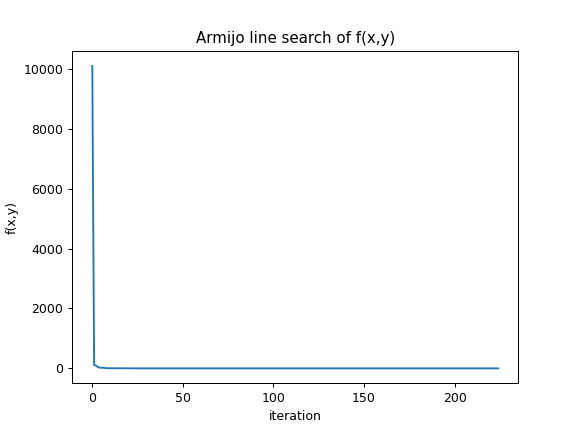

<IPython.core.display.Javascript object>


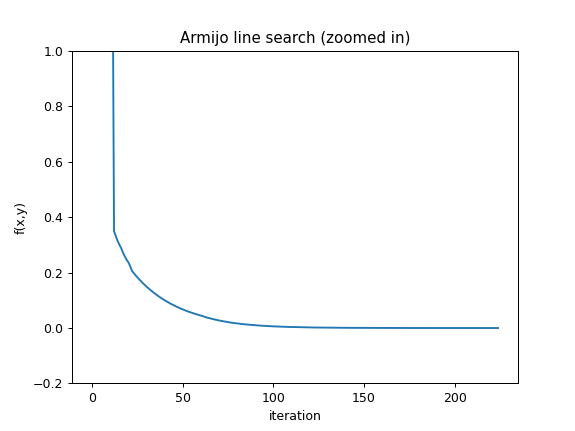

In [80]:
yvals = vals[:iter_count]
xvals = np.arange(iter_count)
plt.figure()
plt.plot(xvals, yvals)
plt.xlabel("iteration")
plt.ylabel("f(x,y)")
plt.title("Armijo line search of f(x,y)")
plt.show()
plt.figure()
plt.plot(xvals, yvals)
plt.ylim([-.2, 1])
plt.title("Armijo line search (zoomed in)")
plt.xlabel("iteration")
plt.ylabel("f(x,y)")
plt.show()

In [81]:
q_test

array([3.57438757e-03, 3.36587785e-05])

The armijo linesearch solution for the (x,y) evaluates to $[3.57438757e-03, 3.36587785e-05]$

## Probelm 2

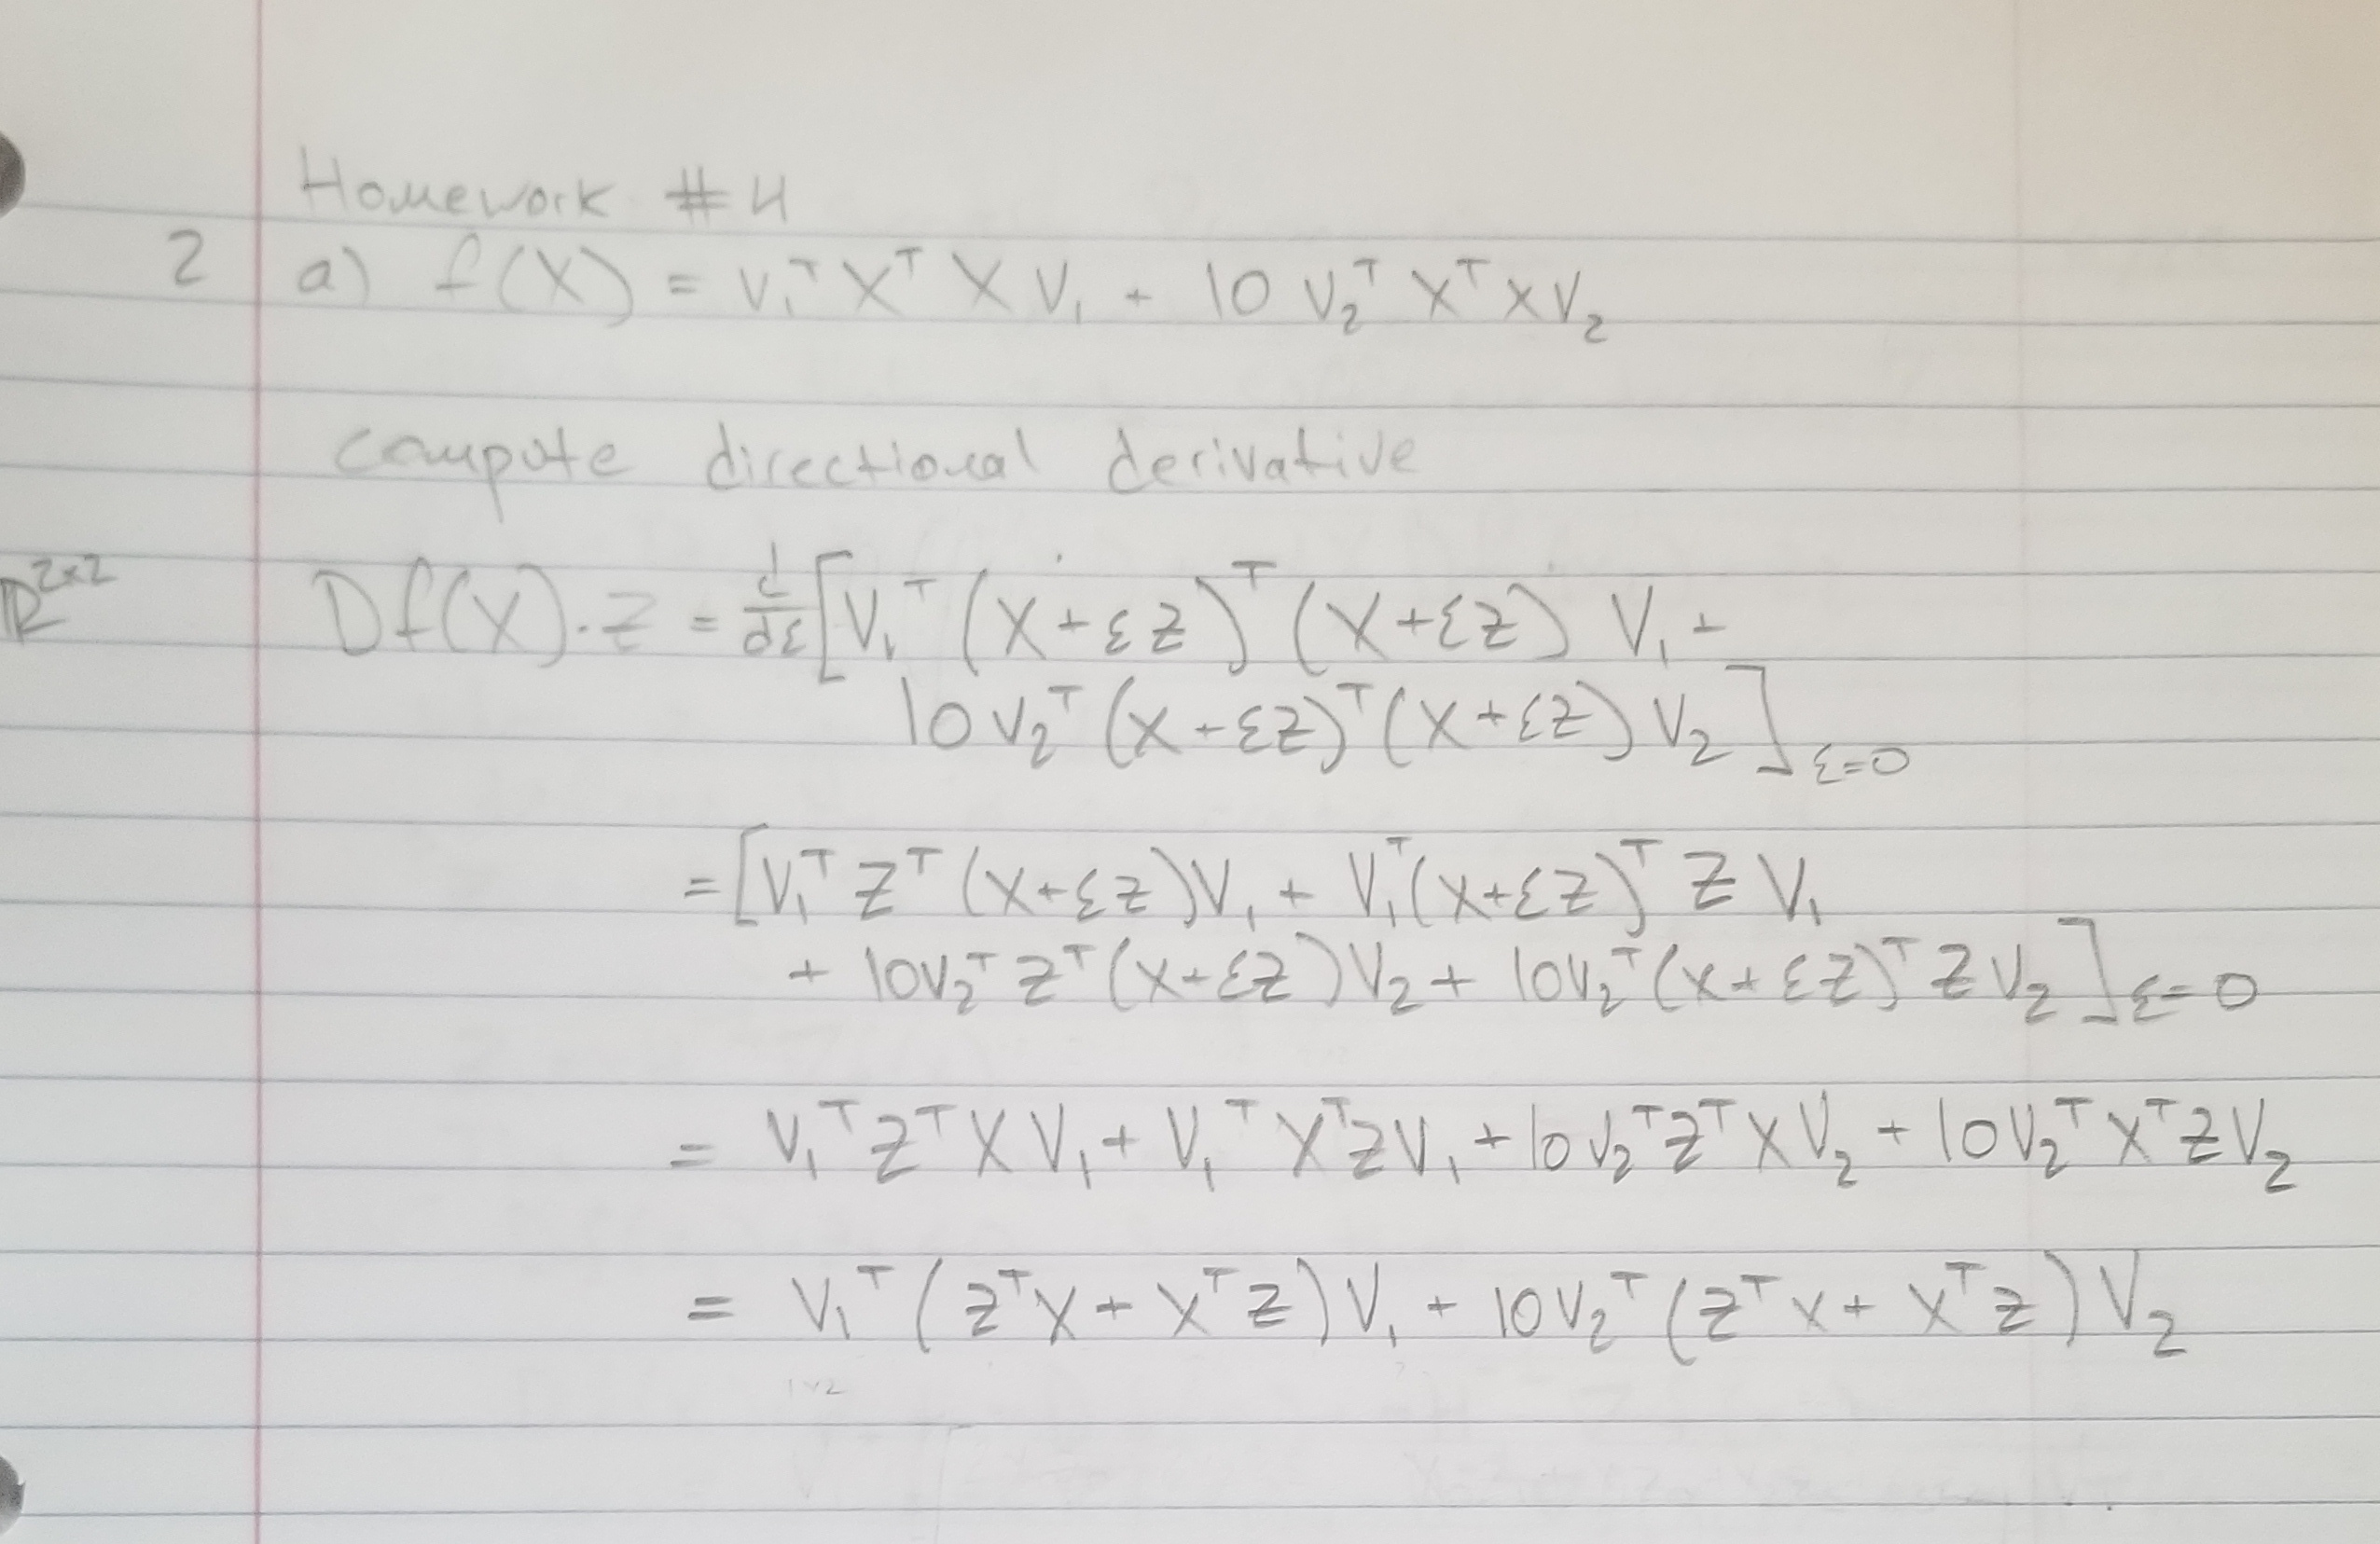

In [197]:
Image("2_a.jpg")

**b).** Compute the gradient of $\nabla f \in \mathbb{R}^{2x2}$

In [110]:
z0, z1, z2, z3, x0, x1, x2, x3, v0, v1 = sym.symbols('z_0 z_1 z_2 z_3 x_0 x_1 x_2 x_3 v_0 v_1')

Z = sym.Matrix([[z0, z1],[z2, z3]])
X = sym.Matrix([[x0, x1],[x2, x3]])
v1 = sym.Matrix([1, 0])
v2 = sym.Matrix([0, 1])

q = sym.Matrix([x0, x1, x2, x3])

f = (v1.T * (X.T * X) * v1) + 10 * v2.T * X.T * X * v2 

In [116]:
grad_f = f.jacobian(q)
grad_f

Matrix([[2*x_0, 20*x_1, 2*x_2, 20*x_3]])

The gradient of f is the output of the above cell

## Probelm 3
Use the Armijo line search to compute the minimizer in $\mathbb{R}^{2x2}$ of $f$ starting with an inital guess of $X = \left[\begin{matrix} 1 & 1 \\ 1 & 1 \end{matrix}\right]$.

Turn in a solution for $X$ and a plot for $f(x,y)$ evaluated at every step

In [175]:
alpha = 0.4
beta = 0.7 
# grad_f_norm_lam = sym.lambdify([q], grad_f.norm())

In [183]:
Df_dot_z = v1.T * (Z.T * X + X.T * Z) * v1 + 10 * v2.T * (Z.T * X + X.T * Z) * v2

#lambdify the local quadratic search we are going to minimize for z
local_quad = sym.lambdify([z, q], Df_dot_z + sym.Matrix([Z[0] * Z[0] + Z[1] * Z[1] + Z[2] * Z[2] + Z[3] * Z[3]]))
#actually dont think we need this 
Df_lam = sym.lambdify([z,q], Df_dot_z)
f_lam = sym.lambdify([X], f)
#lambidfy sufficient decrease comparitor
suff_decr = sym.lambdify([z, q, gamma], f + alpha * gamma * Df_dot_z)

In [185]:
x_guess = np.array([1,1,1,1])
z_i = np.array([0,0,0,0])
eps = 10e-3
vals = np.zeros(250)

In [187]:
iter_count = 0
vals[iter_count] = f_lam(x_guess)
while(grad_f_norm_lam(x_guess) > eps):
    iter_count += 1
    z_i = minimize(local_quad, z_i, (x_guess)).x
    n = 0
    gam = beta**n
    while np.linalg.norm(f_lam(x_guess + gam * z_i)) > np.linalg.norm(suff_decr(z_i, x_guess, gam)):
        n += 1
        gam = beta**n
        
    x_guess = x_guess + gam * z_i
    vals[iter_count] = f_lam(x_guess) 

In [188]:
x_guess

array([0.00227922, 0.00022507, 0.00227922, 0.00022507])

In [190]:
vals = vals[:iter_count]

<IPython.core.display.Javascript object>


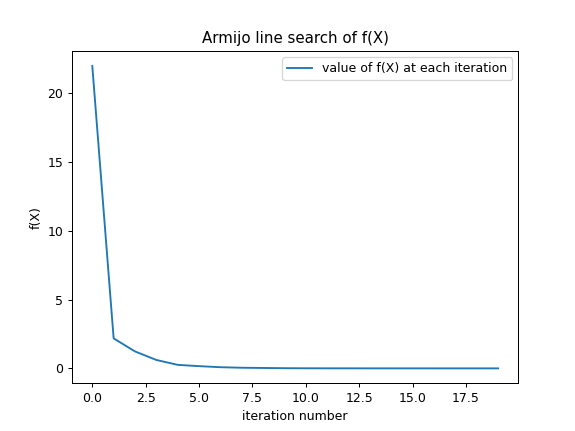

In [196]:
plt.figure()
plt.plot(np.arange(iter_count), vals)
plt.xlabel("iteration number")
plt.ylabel("f(X)")
plt.title("Armijo line search of f(X)")
plt.legend(["value of f(X) at each iteration"])
plt.show()

Therefore my solution is $X = \left[\begin{matrix} 0.00227922 & 0.00022507 \\ 0.00227922 & 0.00022507 \end{matrix}\right]$.